In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import metrics, model_selection
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df1 = pd.read_excel('/content/drive/My Drive/SHRS_smallDS.xlsx',index_col=False)
print(df1.shape)



(30000, 17)


In [5]:
missing_values = df1.isnull().sum()

In [6]:
df_dropped = df1.dropna()

In [7]:
df1['Survival months'] = df1['Survival months'].replace('Unknown', 0).astype(int)

In [8]:
# Define the list of cancer types of interest
cancer_types_of_interest = ['Breast', 'Lung and Bronchus', 'Rectum', 'Prostate', 'Stomach']

# Filter the DataFrame
# The column name 'CancerType' should be replaced with the actual name of your column
data = df1[df1['Site recode ICD-O-3/WHO 2008'].isin(cancer_types_of_interest)]

# Now, 'filtered_data' contains only the records with the specified c

In [9]:
# filter the dataset
def Survival(row):
    if (row['Survival months'] >= 60) and (row['Vital status recode (study cutoff used)'] == 'Alive'):
        return 1
    elif (row['Survival months'] < 60) and (row['SEER cause-specific death classification'] == 'Dead (attributable to this cancer dx)'):
        return 0
    else:
        data.drop(index=row.name, inplace=True)



data['Survived'] = data.apply(Survival, axis=1)
data[:5]

,Site recode ICD-O-3/WHO 2008,Behavior code ICD-O-3,Primary Site,Histologic Type ICD-O-3,Grade Recode (thru 2017),Marital status at diagnosis,Median household income inflation adj to 2021,Regional nodes examined (1988+),Regional nodes positive (1988+),SEER cause-specific death classification,Survival months,Vital status recode (study cutoff used),Age recode with <1 year olds,"Race recode (White, Black, Other)",Sex,Year of diagnosis,CS Tumor Size/Ext Eval (2004-2015),Survived
1,Rectum,Malignant,209,8140,Well differentiated; Grade I,Single (never married),"$75,000+",10,0,Dead (attributable to this cancer dx),49,Dead,65-69 years,White,Male,2000,Blank(s),0.0
4,Lung and Bronchus,Malignant,343,8012,Well differentiated; Grade I,Married (including common law),"$75,000+",1,1,Dead (attributable to this cancer dx),20,Dead,35-39 years,White,Female,1992,Blank(s),0.0
5,Breast,Malignant,506,8520,Moderately differentiated; Grade II,Divorced,"$75,000+",0,98,Dead (attributable to this cancer dx),14,Dead,75-79 years,White,Female,2003,Blank(s),0.0
6,Breast,Malignant,504,8520,Unknown,Single (never married),"$75,000+",20,0,Dead (attributable to this cancer dx),37,Dead,35-39 years,White,Female,1990,Blank(s),0.0
7,Breast,Malignant,504,8500,Poorly differentiated; Grade III,Married (including common law),"$75,000+",0,98,Dead (attributable to this cancer dx),26,Dead,55-59 years,White,Female,1991,Blank(s),0.0


In [10]:
import re

#get the first two interger from a string
def get_first_two_ints(s):
    numbers = re.findall(r'\d+', s)
    return [int(num) for num in numbers[:2]]

# convert to numerical form
data['Age'] = None
data['Income'] = None
data['Tumor Size'] = None
data['Grade Recode'] = None

GR = {'Unknown': 0,'Undifferentiated; anaplastic; Grade IV': 4, 'Poorly differentiated; Grade III': 3, 'Moderately differentiated; Grade II': 2, 'Well differentiated; Grade I': 1}

for index, row in data.iterrows():
    data.at[index, 'Age'] = data.at[index, 'Age recode with <1 year olds'][:2]
    data.at[index, 'Income'] = get_first_two_ints(data.at[index, 'Median household income inflation adj to 2021'])[0]
    if data.at[index, 'CS Tumor Size/Ext Eval (2004-2015)'] == 'Blank(s)':
        data.at[index, 'Tumor Size'] = 0
    else:
        data.at[index, 'Tumor Size'] = data.at[index, 'CS Tumor Size/Ext Eval (2004-2015)']
    data.at[index, 'Grade Recode'] = GR[data.at[index, 'Grade Recode (thru 2017)']]

data['Survived'] = data['Survived'].astype(int)
data['Age'] = data['Age'].astype(int)
data['Income'] = data['Income'].astype(int)
data['Tumor Size'] = data['Tumor Size'].astype(int)
data['Grade Recode'] = data['Grade Recode'].astype(int)
data

,Site recode ICD-O-3/WHO 2008,Behavior code ICD-O-3,Primary Site,Histologic Type ICD-O-3,Grade Recode (thru 2017),Marital status at diagnosis,Median household income inflation adj to 2021,Regional nodes examined (1988+),Regional nodes positive (1988+),SEER cause-specific death classification,...,Age recode with <1 year olds,"Race recode (White, Black, Other)",Sex,Year of diagnosis,CS Tumor Size/Ext Eval (2004-2015),Survived,Age,Income,Tumor Size,Grade Recode
1,Rectum,Malignant,209,8140,Well differentiated; Grade I,Single (never married),"$75,000+",10,0,Dead (attributable to this cancer dx),...,65-69 years,White,Male,2000,Blank(s),0,65,75,0,1
4,Lung and Bronchus,Malignant,343,8012,Well differentiated; Grade I,Married (including common law),"$75,000+",1,1,Dead (attributable to this cancer dx),...,35-39 years,White,Female,1992,Blank(s),0,35,75,0,1
5,Breast,Malignant,506,8520,Moderately differentiated; Grade II,Divorced,"$75,000+",0,98,Dead (attributable to this cancer dx),...,75-79 years,White,Female,2003,Blank(s),0,75,75,0,2
6,Breast,Malignant,504,8520,Unknown,Single (never married),"$75,000+",20,0,Dead (attributable to this cancer dx),...,35-39 years,White,Female,1990,Blank(s),0,35,75,0,0
7,Breast,Malignant,504,8500,Poorly differentiated; Grade III,Married (including common law),"$75,000+",0,98,Dead (attributable to this cancer dx),...,55-59 years,White,Female,1991,Blank(s),0,55,75,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29990,Lung and Bronchus,Malignant,341,8140,Well differentiated; Grade I,Widowed,"$75,000+",98,0,Dead (attributable to this cancer dx),...,55-59 years,White,Female,1991,Blank(s),0,55,75,0,1
29991,Stomach,Malignant,160,8140,Moderately differentiated; Grade II,Single (never married),"$75,000+",5,5,Dead (attributable to this cancer dx),...,65-69 years,White,Male,1991,Blank(s),0,65,75,0,2
29993,Lung and Bronchus,Malignant,342,8041,Undifferentiated; anaplastic; Grade IV,Divorced,"$70,000 - $74,999",0,98,Dead (attributable to this cancer dx),...,55-59 years,White,Female,1991,Blank(s),0,55,70,0,4
29997,Lung and Bronchus,Malignant,349,8140,Poorly differentiated; Grade III,Single (never married),"$70,000 - $74,999",0,98,Dead (attributable to this cancer dx),...,65-69 years,Black,Male,1991,Blank(s),0,65,70,0,3


In [11]:
# Initialize a dictionary to store the mappings
category_mappings = {}

# Manually encode each categorical column to numerical values
for column in data.select_dtypes(include=['object']):
    # Create a mapping for the current column
    categories = data[column].unique()
    mapping = {category: index for index, category in enumerate(categories)}
    category_mappings[column] = mapping

    # Replace the categorical values with numerical values
    data[column] = data[column].replace(mapping)

print("Encoded DataFrame:")
print(data)

print("\nCategory Mappings:")
for column, mapping in category_mappings.items():
    print(f"{column}: {mapping}")

Encoded DataFrame:
       Site recode ICD-O-3/WHO 2008  Behavior code ICD-O-3  Primary Site  \
1                                 0                      0           209   
4                                 1                      0           343   
5                                 2                      0           506   
6                                 2                      0           504   
7                                 2                      0           504   
...                             ...                    ...           ...   
29990                             1                      0           341   
29991                             3                      0           160   
29993                             1                      0           342   
29997                             1                      0           349   
29998                             1                      0           341   

       Histologic Type ICD-O-3  Grade Recode (thru 2017)  \
1       

In [12]:
data

,Site recode ICD-O-3/WHO 2008,Behavior code ICD-O-3,Primary Site,Histologic Type ICD-O-3,Grade Recode (thru 2017),Marital status at diagnosis,Median household income inflation adj to 2021,Regional nodes examined (1988+),Regional nodes positive (1988+),SEER cause-specific death classification,...,Age recode with <1 year olds,"Race recode (White, Black, Other)",Sex,Year of diagnosis,CS Tumor Size/Ext Eval (2004-2015),Survived,Age,Income,Tumor Size,Grade Recode
1,0,0,209,8140,0,0,0,10,0,0,...,0,0,0,2000,0,0,65,75,0,1
4,1,0,343,8012,0,1,0,1,1,0,...,1,0,1,1992,0,0,35,75,0,1
5,2,0,506,8520,1,2,0,0,98,0,...,2,0,1,2003,0,0,75,75,0,2
6,2,0,504,8520,2,0,0,20,0,0,...,1,0,1,1990,0,0,35,75,0,0
7,2,0,504,8500,3,1,0,0,98,0,...,3,0,1,1991,0,0,55,75,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29990,1,0,341,8140,0,3,0,98,0,0,...,3,0,1,1991,0,0,55,75,0,1
29991,3,0,160,8140,1,0,0,5,5,0,...,0,0,0,1991,0,0,65,75,0,2
29993,1,0,342,8041,4,2,1,0,98,0,...,3,0,1,1991,0,0,55,70,0,4
29997,1,0,349,8140,3,0,1,0,98,0,...,0,1,0,1991,0,0,65,70,0,3


In [13]:
# make a new data frame and store the useful attributes
final = data[['Site recode ICD-O-3/WHO 2008','Race recode (White, Black, Other)',
           'Sex',
           'Histologic Type ICD-O-3',
           'Regional nodes examined (1988+)',
           'Regional nodes positive (1988+)',
           'Primary Site',
           'Marital status at diagnosis',
           'Survived',
           'Age',
           'Income',
           'Tumor Size',
           'Grade Recode']]
final

,Site recode ICD-O-3/WHO 2008,"Race recode (White, Black, Other)",Sex,Histologic Type ICD-O-3,Regional nodes examined (1988+),Regional nodes positive (1988+),Primary Site,Marital status at diagnosis,Survived,Age,Income,Tumor Size,Grade Recode
1,0,0,0,8140,10,0,209,0,0,65,75,0,1
4,1,0,1,8012,1,1,343,1,0,35,75,0,1
5,2,0,1,8520,0,98,506,2,0,75,75,0,2
6,2,0,1,8520,20,0,504,0,0,35,75,0,0
7,2,0,1,8500,0,98,504,1,0,55,75,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29990,1,0,1,8140,98,0,341,3,0,55,75,0,1
29991,3,0,0,8140,5,5,160,0,0,65,75,0,2
29993,1,0,1,8041,0,98,342,2,0,55,70,0,4
29997,1,1,0,8140,0,98,349,0,0,65,70,0,3


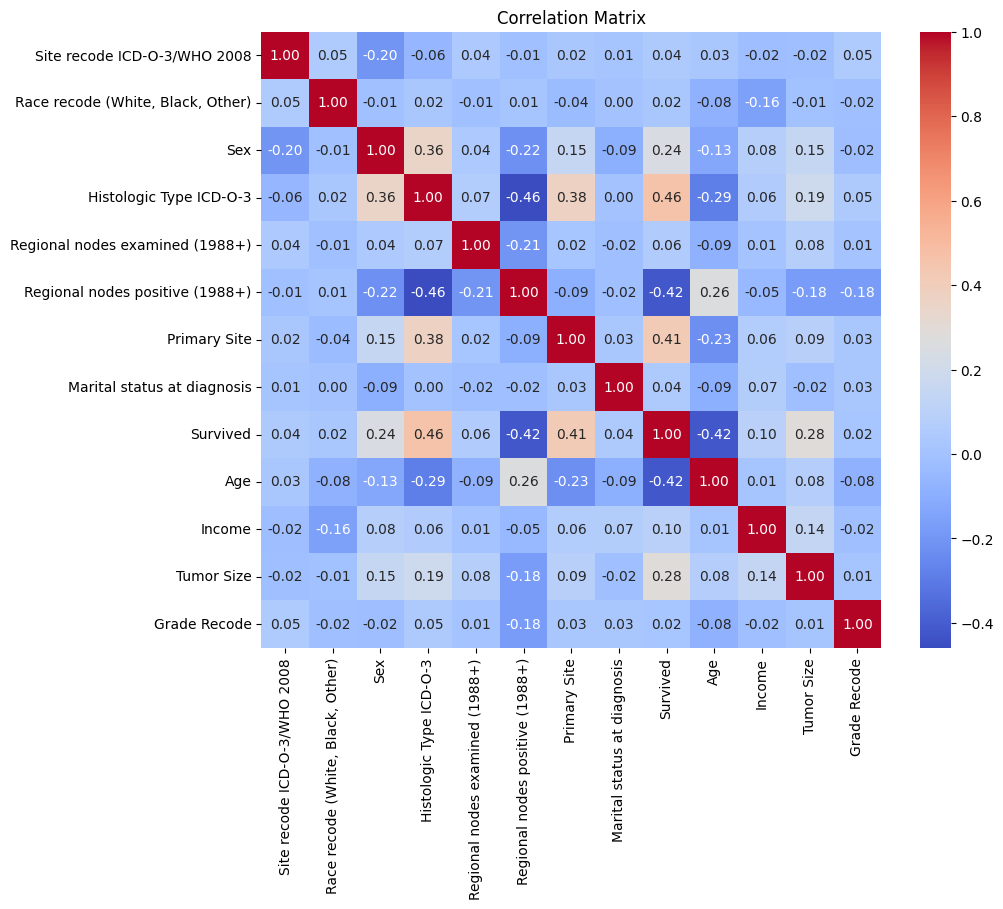

In [ ]:
correlation_matrix = final.corr()
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title (optional)
plt.title('Correlation Matrix')

# Show the plot
plt.show()

In [ ]:
X = final.drop('Survived', axis='columns')
X

,Site recode ICD-O-3/WHO 2008,"Race recode (White, Black, Other)",Sex,Histologic Type ICD-O-3,Regional nodes examined (1988+),Regional nodes positive (1988+),Primary Site,Marital status at diagnosis,Age,Income,Tumor Size,Grade Recode
1,0,0,0,8140,10,0,209,0,65,75,0,1
2,1,0,1,8140,8,1,199,0,35,75,3,2
3,2,1,0,8140,14,1,182,1,60,75,0,2
4,3,0,1,8012,1,1,343,2,35,75,0,1
5,4,0,1,8520,0,98,506,3,75,75,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
29993,3,0,1,8041,0,98,342,3,55,70,0,4
29995,9,0,1,8140,0,98,239,3,70,70,0,0
29997,3,1,0,8140,0,98,349,0,65,70,0,3
29998,3,0,0,8012,0,98,341,2,75,75,0,0


In [ ]:
y = final['Survived']
y

1        0
2        1
3        0
4        0
5        0
        ..
29993    0
29995    0
29997    0
29998    0
29999    0
Name: Survived, Length: 14641, dtype: int64

In [ ]:
sensitive_features_df = final[['Sex', 'Marital status at diagnosis', 'Race recode (White, Black, Other)', 'Income']]

In [ ]:
pip install fairlearn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.1/234.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 36.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvi

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from fairlearn.metrics import MetricFrame, selection_rate
from fairlearn.reductions import ExponentiatedGradient, EqualizedOdds


In [ ]:
from sklearn.linear_model import LogisticRegression
from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import accuracy_score
from fairlearn.metrics import MetricFrame, selection_rate
from fairlearn.reductions import ExponentiatedGradient, EqualizedOdds
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Assume X, y, and sensitive_features_df are already defined

# Split data into training and testing sets
X_train, X_test, y_train, y_test, sensitive_features_train, sensitive_features_test = train_test_split(
    X, y, sensitive_features_df, test_size=0.2, random_state=42)

# Train the initial (unmitigated) model
unmitigated_model = LogisticRegression().fit(X_train, y_train)

# Make predictions with the initial model
y_pred_unmitigated = unmitigated_model.predict(X_test)

# Assess fairness of the initial model
metric_frame_unmitigated = MetricFrame(
    metrics={
        'accuracy': accuracy_score,
        'selection_rate': selection_rate
    },
    y_true=y_test,
    y_pred=y_pred_unmitigated,
    sensitive_features=sensitive_features_test
)

# Print the accuracy for the unmitigated model
print("Unmitigated model accuracy:")
print(accuracy_score(y_test, y_pred_unmitigated))

# Print the accuracy by group for the unmitigated model
#print("\nUnmitigated model accuracy by group:")
#print(metric_frame_unmitigated.by_group['accuracy'])

# Define and fit the mitigated model
mitigator = ExponentiatedGradient(
    estimator=LogisticRegression(),
    constraints=EqualizedOdds()
)

mitigated_model = mitigator.fit(
    X_train, y_train,
    sensitive_features=sensitive_features_train
)

# Make predictions with the mitigated model
y_pred_mitigated = mitigated_model.predict(X_test)

# Assess fairness of the mitigated model
metric_frame_mitigated = MetricFrame(
    metrics={
        'accuracy': accuracy_score,
        'selection_rate': selection_rate
    },
    y_true=y_test,
    y_pred=y_pred_mitigated,
    sensitive_features=sensitive_features_test
)

# Print metrics for the unmitigated model
# If you have multiple sensitive features and want to print for each one separately
for feature in sensitive_features_test.columns:
    metric_frame = MetricFrame(
        metrics={'accuracy': accuracy_score},
        y_true=y_test,
        y_pred=y_pred_unmitigated,
        sensitive_features=sensitive_features_test[feature]
    )
    print(f"Unmitigated model accuracy by group for '{feature}':")
    print(metric_frame.by_group['accuracy'])
# If you have multiple sensitive features and want to print for each one separately
for feature in sensitive_features_test.columns:
    metric_frame = MetricFrame(
        metrics={'accuracy': accuracy_score},
        y_true=y_test,
        y_pred=y_pred_mitigated,
        sensitive_features=sensitive_features_test[feature]
    )
    print(f"Mitigated model accuracy by group for '{feature}':")
    print(metric_frame.by_group['accuracy'])


Unmitigated model accuracy:
0.8586548310003415
Unmitigated model accuracy by group for 'Sex':
Sex
0    0.909250
1    0.826136
Name: accuracy, dtype: float64
Unmitigated model accuracy by group for 'Marital status at diagnosis':
Marital status at diagnosis
0    0.812500
1    0.918699
2    0.845960
3    0.865132
4    0.846154
Name: accuracy, dtype: float64
Unmitigated model accuracy by group for 'Race recode (White, Black, Other)':
Race recode (White, Black, Other)
0    0.862516
1    0.878594
2    0.808581
Name: accuracy, dtype: float64
Unmitigated model accuracy by group for 'Income':
Income
70    0.896373
75    0.852930
Name: accuracy, dtype: float64
Mitigated model accuracy by group for 'Sex':
Sex
0    0.873473
1    0.674706
Name: accuracy, dtype: float64
Mitigated model accuracy by group for 'Marital status at diagnosis':
Marital status at diagnosis
0    0.717500
1    0.907317
2    0.697601
3    0.763158
4    0.846154
Name: accuracy, dtype: float64
Mitigated model accuracy by group f

In [ ]:
pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt


ImportError: ignored

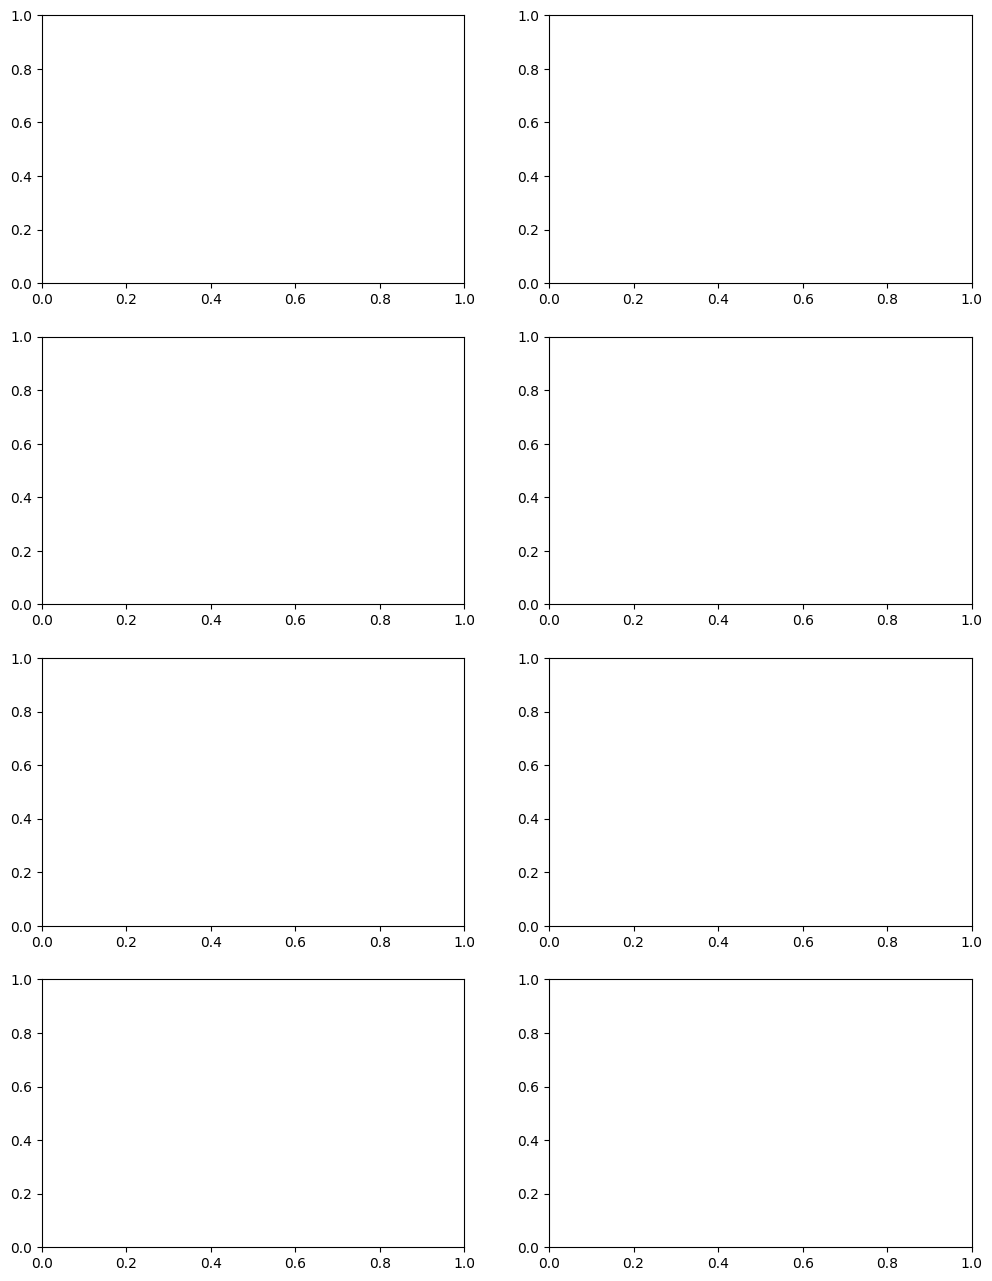

In [ ]:
# Function to plot the accuracy by group for a given MetricFrame and feature name
def plot_accuracy_by_group(metric_frame, feature_name, title, ax):
    # Extract the accuracies for the feature
    accuracies = metric_frame.by_group['accuracy'].reset_index(level=feature_name)

    # Plot the accuracies
    accuracies.plot(kind='bar', y='accuracy', ax=ax, legend=False)
    ax.set_title(title)
    ax.set_xlabel(feature_name)
    ax.set_ylabel('Accuracy')

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(nrows=len(sensitive_features_test.columns), ncols=2, figsize=(12, len(sensitive_features_test.columns) * 4), squeeze=False)

# Plot for each sensitive feature
for idx, feature in enumerate(sensitive_features_test.columns):
    plot_accuracy_by_group(metric_frame_unmitigated, feature, f'Unmitigated Model - {feature}', axes[idx, 0])
    plot_accuracy_by_group(metric_frame_mitigated, feature, f'Mitigated Model - {feature}', axes[idx, 1])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()




In [ ]:
import pandas as pd
from fairlearn.metrics import MetricFrame, selection_rate
from sklearn.metrics import accuracy_score


In [ ]:

# Create an empty DataFrame to store our summaries
summary_df_unmitigated = pd.DataFrame()
summary_df_mitigated = pd.DataFrame()

# Define the metrics dictionary to be used for both models
metrics_dict = {
    'accuracy': accuracy_score,
    'selection_rate': selection_rate  # Assuming selection_rate is available from fairlearn.metrics
}

# Loop over each sensitive feature to calculate metrics for the unmitigated model
for feature_name in sensitive_features_test.columns:
    mf_unmitigated = MetricFrame(
        metrics=metrics_dict,
        y_true=y_test,
        y_pred=y_pred_unmitigated,  # replace with your actual predictions
        sensitive_features=sensitive_features_test[feature_name]
    )
    summary_df_unmitigated[feature_name] = mf_unmitigated.by_group.mean()

# Loop over each sensitive feature to calculate metrics for the mitigated model
for feature_name in sensitive_features_test.columns:
    mf_mitigated = MetricFrame(
        metrics=metrics_dict,
        y_true=y_test,
        y_pred=y_pred_mitigated,  # replace with your actual predictions
        sensitive_features=sensitive_features_test[feature_name]
    )
    summary_df_mitigated[feature_name] = mf_mitigated.by_group.mean()

# Combine the summaries into a single DataFrame for comparison
summary_df = pd.concat([summary_df_unmitigated.add_suffix('_unmitigated'),
                        summary_df_mitigated.add_suffix('_mitigated')], axis=1)

# Transpose the final DataFrame so that each row represents a sensitive feature
# and each column represents a metric for the unmitigated/mitigated model
summary_df = summary_df.T

# Print the summary DataFrame
print(summary_df)

                                               accuracy  selection_rate
Sex_unmitigated                                0.867693        0.196059
Marital status at diagnosis_unmitigated        0.857689        0.211730
Race recode (White, Black, Other)_unmitigated  0.849897        0.223910
Income_unmitigated                             0.874651        0.193679
Sex_mitigated                                  0.774089        0.007105
Marital status at diagnosis_mitigated          0.786346        0.006323
Race recode (White, Black, Other)_mitigated    0.751289        0.008766
Income_mitigated                               0.786035        0.006523


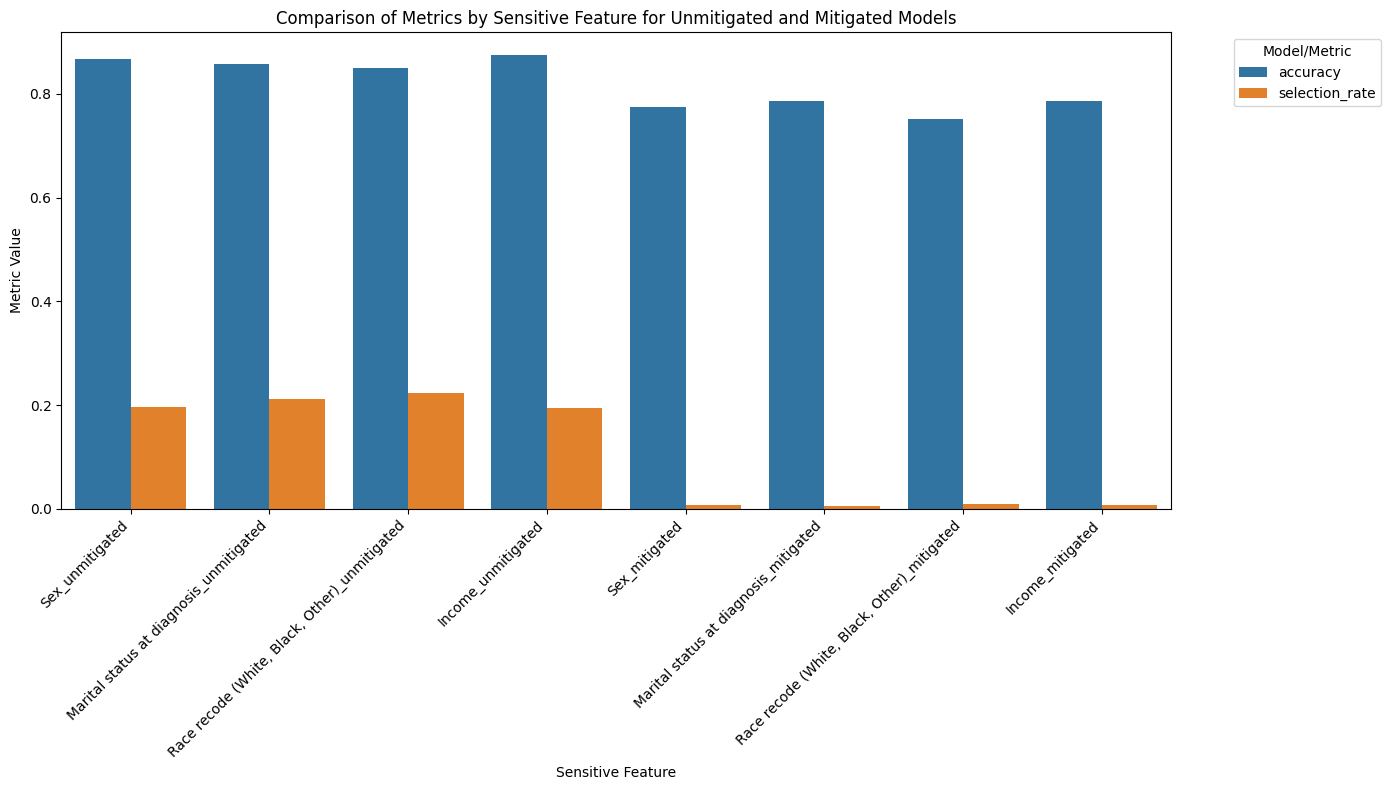

In [ ]:


# Assuming summary_df is already created as per the previous code snippet

# Since we transposed the summary DataFrame, each column represents a metric for the unmitigated/mitigated model,
# and each row represents a sensitive feature.

# Reset index to use default integer index and turn 'index' into a column for plotting
summary_df_reset = summary_df.reset_index()

# Melt the DataFrame to long-format for seaborn to plot
summary_df_melted = summary_df_reset.melt(id_vars='index', var_name='Model_Metric', value_name='Value')

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(data=summary_df_melted, x='index', y='Value', hue='Model_Metric')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Sensitive Feature')
plt.ylabel('Metric Value')
plt.title('Comparison of Metrics by Sensitive Feature for Unmitigated and Mitigated Models')
plt.legend(title='Model/Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()